In [95]:
import importlib
import utils
importlib.reload(utils)
import torch 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import os

In [6]:
sami_ECG, sami_db = utils.load_data("C:/Users/emanu/OneDrive/Desktop/Physione2025Data/Sami/samtrop_db/2025-03-16 143145")

cropping to the smallest dimension


In [16]:
sami_db

,Unnamed: 0,Age,Sex,Label
0,0,64,1,1
1,1,68,0,1
2,2,70,0,1
3,3,49,0,1
4,4,72,0,1
...,...,...,...,...
810,810,74,0,1
811,811,61,1,1
812,812,73,0,1
813,813,55,0,1


In [10]:
code15_ECG, code15_db = utils.load_data("C:/Users/emanu/OneDrive/Desktop/Physione2025Data/Code-15%/code15_db/2025-03-16 143108")

cropping to the dimension of the smallest


In [ ]:
code15_ECG.size() 

torch.Size([39798, 1568, 12])

In [15]:
code15_db[code15_db['Label']==1]

,Unnamed: 0,Age,Sex,Label
89,89,63,0,1
151,151,33,1,1
187,187,57,0,1
194,194,83,0,1
195,195,84,0,1
...,...,...,...,...
39559,39559,50,0,1
39606,39606,60,1,1
39616,39616,43,0,1
39702,39702,44,0,1


In [18]:
code15_ECG[code15_db['Label']==1].size()

torch.Size([819, 1568, 12])

In [69]:
training_set_positive_label = torch.cat((sami_ECG,code15_ECG[code15_db['Label']==1]),axis=0)


In [70]:
training_set_positive_label.size()


torch.Size([1634, 1568, 12])

In [71]:
training_set_negative_labels = code15_ECG[code15_db['Label']==0]
training_set_negative_labels = training_set_negative_labels[:1634]

In [72]:
training_set_negative_labels.size()

torch.Size([1634, 1568, 12])

In [73]:
training_set = torch.cat((training_set_positive_label,training_set_negative_labels),axis=0)


In [74]:
training_set.size()


torch.Size([3268, 1568, 12])

In [77]:
labels = np.zeros(training_set.size(0))
labels[:1633]=1

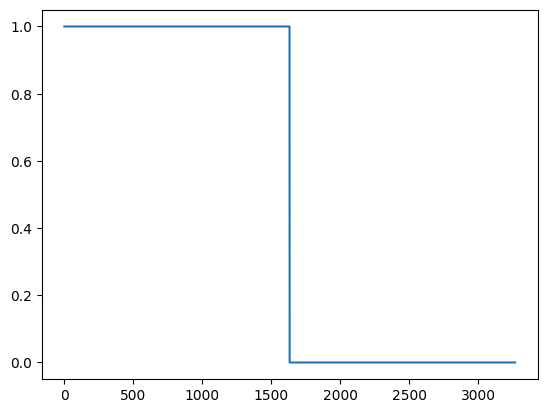

In [78]:

plt.plot(labels)

In [79]:
indices = torch.randperm(training_set.size(0))

In [80]:
indices.size()

torch.Size([3268])

In [81]:
training_set = training_set[indices]

In [82]:
labels= labels[indices.numpy()]


In [88]:
labels

array([1., 0., 0., ..., 0., 1., 0.])

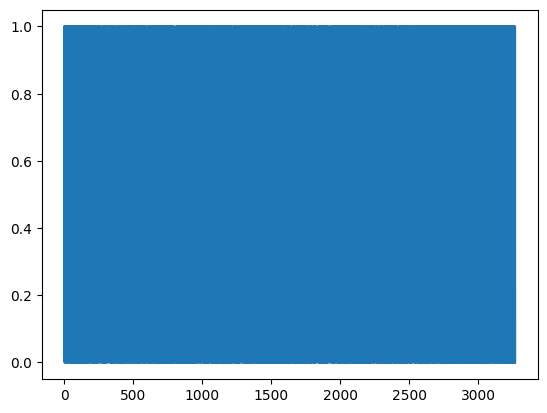

In [84]:
plt.plot(labels)

In [96]:
save_training_set(training_set,labels,"C:/Users/emanu/OneDrive/Desktop/Physione2025Data/Training_data")

In [ ]:

def saving_data(pickel_file,pandas_file,dir_for_saving): 
    now = datetime.now()
    date_time_string = now.strftime("%Y-%m-%d %H%M%S")
    comments = input("Insert the comments")
    saving_path = dir_for_saving + '/' + date_time_string + '/'
    os.makedirs(os.path.dirname(saving_path), exist_ok=True)

    pandas_file.to_csv(saving_path + 'db.csv')
    with open(saving_path + 'comments.txt','w') as f:  
        f.write(comments)
    with open(saving_path + 'ECG.pkl','wb') as f: 
        pickle.dump(pickel_file,f)
    print('Saving succesful')

In [ ]:
"C:\Users\emanu\OneDrive\Desktop\Physione2025Data\Training_data"